In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df0=pd.read_csv("T0000.CSV", header=14)
df0


,TIME,CH1,CH1 Peak Detect,CH2,CH2 Peak Detect
0,-5.000000,0.432,0.424,-0.016,-3.200000e-02
1,-4.999992,0.432,0.440,-0.008,-1.788140e-10
2,-4.999984,0.432,0.424,-0.008,-3.200000e-02
3,-4.999976,0.432,0.440,-0.008,-1.788140e-10
4,-4.999968,0.432,0.424,-0.016,-3.200000e-02
...,...,...,...,...,...
1249995,4.999960,0.024,0.024,0.048,4.800000e-02
1249996,4.999968,0.024,0.008,0.032,1.600000e-02
1249997,4.999976,0.016,0.024,0.040,5.600000e-02
1249998,4.999984,0.024,0.008,0.040,1.600000e-02


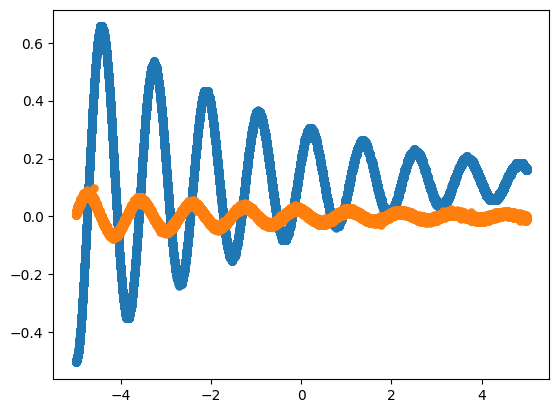

In [31]:
plt.scatter(df0["TIME"], df0["CH1"], linewidth=0.1)
plt.scatter(df0["TIME"], df0["CH2"], linewidth=0.1)
plt.show()

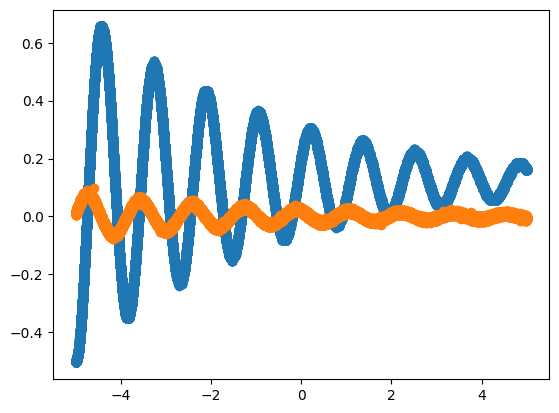

In [32]:
df1=pd.read_csv("T0001.CSV", header=14)
df1
plt.scatter(df1["TIME"], df1["CH1"])
plt.scatter(df1["TIME"], df1["CH2"])
plt.show()

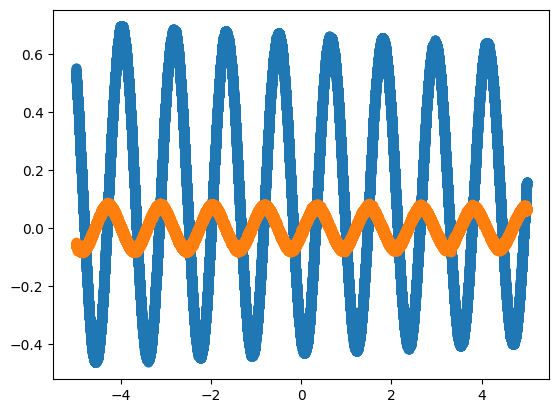

In [33]:
df2=pd.read_csv("T0002.CSV", header=14)
df2
plt.scatter(df2["TIME"], df2["CH1"])
plt.scatter(df2["TIME"], df2["CH2"])
plt.show()